In [ ]:
import matplotlib.pyplot as plt
#import bpy
#from bpy import context, data, ops
import numpy as np

In [ ]:
uv_count = 100
def readPoints(file_path):
    points = []
    ind = 0
    setofpoints = []

    for line in open(file_path,"r"):
        values=line.split()

        if len(values)!=3:
            continue

        eachBezierpoints = []
        for val in values:
            eachBezierpoints.append(float(val))
        setofpoints.append(eachBezierpoints)
        
        if ind ==3:
            temp = setofpoints[3]
            setofpoints[3] = setofpoints[2]
            setofpoints[2] = temp
            points.append(setofpoints)
            setofpoints = []
            ind = 0
            setofpoints = []
            continue
            
        ind = ind + 1
        #print(ind)
    points = np.array(points)
    return points

def n_c_i_factorial(n, i):
    numerator = 1
    for val in reversed(range(n)):
        if val!=0:
            numerator = numerator * val
    #print("numerator : ",numerator)
    denominator_1 = 1
    for val in reversed(range(i+1)):
        if val!=0:
            denominator_1 = denominator_1 * val
    denominator_2 = 1
    for val in reversed(range(n-i)):
        if val!=0:
            denominator_2 = denominator_2 * val

    return numerator/(denominator_1*denominator_2)

def bcurvepoints(points):
    u_values = np.linspace(0, 1, uv_count)

    n = len(points)
    updated_points = []

    for u in u_values:
      bernstein_value = 0
      for i in range(n):
        bernstein_value = bernstein_value + ( n_c_i_factorial(n,i) * ((1-u)**(n-1-i)) * (u**i) * points[i] ) 
      updated_points.append( bernstein_value )

    return updated_points

def makeVertices(c_curve, d_curve):
    vertices = []
    v_values = np.linspace(0, 1, uv_count)
    for c,d in zip(c_curve, d_curve):
      for v in v_values:
        vertices.append(c*(1-v) + d*v)
    return vertices
    
def coonspointsConstruction(surface_one, surface_two, plane_surface):
  coonspoints = []
  surface_one = np.array(surface_one)
  surface_two = np.array(surface_two)
  plane_surface = np.array(plane_surface)
  for i in range(len(plane_surface)):
    coonspoints.append(surface_one[i]+surface_two[i]-plane_surface[i])
  return coonspoints

def createFaces(coonspoints):
  faces = []
  for i in range(len(coonspoints)):
    if i+uv_count<len(coonspoints) and i+1+uv_count<len(coonspoints) and i+1<len(coonspoints):
      faces.append([i, i+1, i+uv_count, i+1+uv_count])
  return faces
  
file_path="/content/coons_patch_points.txt"
points = readPoints(file_path)
plane_surface = makeVertices(makeVertices( [points[0][0]], [points[0][3]]), makeVertices([points[1][0]], [points[1][3]]))
surface_one = makeVertices(bcurvepoints(points[0]), bcurvepoints(points[1]))
t_surface_two = makeVertices(bcurvepoints(points[2]), bcurvepoints(points[3]))
#surface_two = np.array(surface_two).T.tolist()
surface_two = []
t_dict = {}
for i in range(len(t_surface_two)):
  if i//uv_count in t_dict:
    t_dict[i//uv_count].append(t_surface_two[i])
  else:
    t_dict[i//uv_count] = [t_surface_two[i]]

t_dict = dict(sorted(t_dict.items()))

for i in range(uv_count):
  for t_list in t_dict:
    surface_two.append(t_dict[t_list][i]) 
coonspoints = coonspointsConstruction(surface_one, surface_two, plane_surface)
print(points)

[[[-1.  -1.   0.5]
  [-0.2 -1.   0.8]
  [ 0.  -1.   0. ]
  [ 1.  -1.   0. ]]

 [[-1.   1.   1. ]
  [-0.2  1.   1.3]
  [ 0.   1.   0.5]
  [ 1.   1.   0.5]]

 [[-1.  -1.   0.5]
  [-1.  -0.8  0.3]
  [-1.   0.4  1.3]
  [-1.   1.   1. ]]

 [[ 1.  -1.   0. ]
  [ 1.   0.   0. ]
  [ 1.   0.8  0.5]
  [ 1.   1.   0.5]]]


In [ ]:
len(plane_surface)

10000

In [ ]:
plane_surface[0]

In [ ]:
makeVertices( makeVertices( [points[0][0]], [points[1][0]]), makeVertices([points[0][3]], [points[1][3]]) ) 

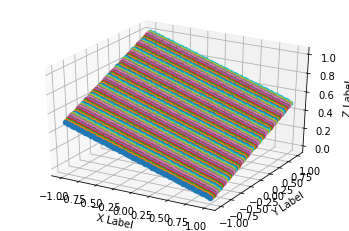

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in plane_surface :
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

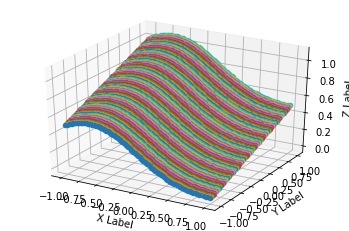

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in surface_one:
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

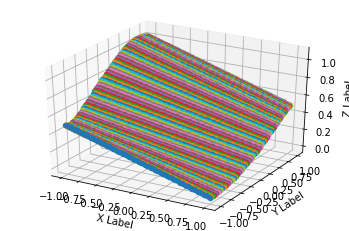

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in surface_two:
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

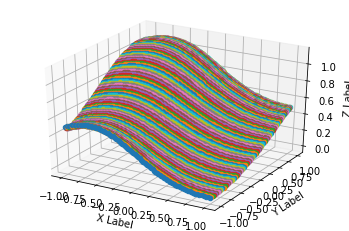

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in coonspoints:
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

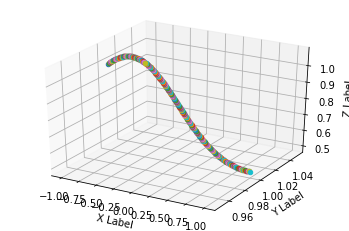

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in bcurvepoints(points[1]):
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

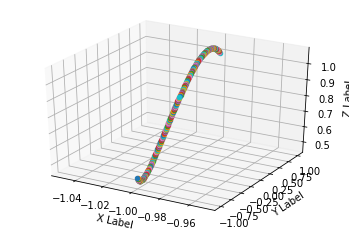

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in bcurvepoints(points[2]):
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

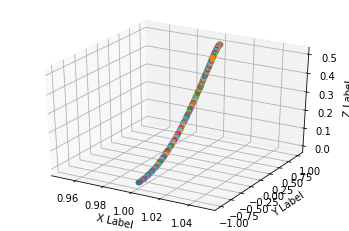

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xs, ys, zs in bcurvepoints(points[3]):
    ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
temp = bcurvepoints(points[0])

In [ ]:
temp

In [ ]:
n=2
for val in reversed(range(n)):
  print(val)

1
0


In [ ]:
0.0**0

1.0

In [ ]:
import math
math.sqrt(0)

0.0